<a href="https://colab.research.google.com/github/tenacioussami/Machine-learning-/blob/main/assignment7_Introduction_to_Machine_Learning_Skill_Morph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
print("Welcome to water potability with Skill Morph!")
print("We will build a Skill Morph will detect water pollution")

Welcome to water potability with Skill Morph!
We will build a Skill Morph will detect water pollution


# **Introduction**

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [6]:
print("Reading the real water potability dataset...")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/datasets/water_potability.csv')

print(f"Dataset loaded! We have data from {len(data)} real patients")
print(f"Each patient has {len(data.columns)-1} medical measurements")

# Show first few column
print(data[['ph','Hardness','Solids','Organic_carbon','Trihalomethanes','Turbidity']].head())

print(f"\nUnderstanding Potability:")
diagnosis_counts = data['Potability'].value_counts()
print(f"M (zero = Dangerous ):  {diagnosis_counts[0]} values")
print(f"B (One = Harmless ):      {diagnosis_counts[1]} values")
print(f"Total patients:                    {len(data)} pollution")

Reading the real water potability dataset...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded! We have data from 3276 real patients
Each patient has 9 medical measurements
         ph    Hardness        Solids  Organic_carbon  Trihalomethanes  \
0       NaN  204.890455  20791.318981       10.379783        86.990970   
1  3.716080  129.422921  18630.057858       15.180013        56.329076   
2  8.099124  224.236259  19909.541732       16.868637        66.420093   
3  8.316766  214.373394  22018.417441       18.436524       100.341674   
4  9.092223  181.101509  17978.986339       11.558279        31.997993   

   Turbidity  
0   2.963135  
1   4.500656  
2   3.055934  
3   4.628771  
4   4.075075  

Understanding Potability:
M (zero = Dangerous ):  1998 values
B (One = Harmless ):      1278 values
Total patients:                    3276 pollution


# **Prepare Data**

In [9]:
print("Computers only understand numbers, not letters!")
print("Your data already contains numeric values (0 = Not Potable, 1 = Potable).")

# No need for mapping since it's already numeric
# So we’ll just rename it clearly if you want
#data['Potability_numeric'] = data['Potability']  # keep same values

print("No conversion needed — data is already numeric!")

# Select only the most important features
important_features = [
    'ph',
    'Chloramines',
    'Sulfate',
    'Hardness',
    'Turbidity'
]
potability1 = ['Potability']
# Create simple dataset
X = data[important_features]   # input features
y = data[potability1]  # target column

print("\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (Potability): {y.shape}")


Computers only understand numbers, not letters!
Your data already contains numeric values (0 = Not Potable, 1 = Potable).
No conversion needed — data is already numeric!

Data prepared:
X (measurements): (3276, 5)
y (Potability): (3276, 1)


In [8]:
# Fill missing values with the mean of each column
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

print("Missing values filled with the mean of each column.")

Missing values filled with the mean of each column.


# **Train and Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())
print(y_train.head())

Training: 2620 patients (computer will learn from these)
Testing:  656 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
            ph  Chloramines     Sulfate    Hardness  Turbidity
3229  7.080795     6.828936  333.775777  203.204659   3.065910
2494  6.039823     7.723305  350.756261  164.026340   3.923766
2313  7.080795     5.563067  379.962973  144.995790   4.904367
1907  7.369989     7.404435  359.930566  236.476721   3.463852
2170  7.080795     7.267573  330.905370  162.512684   3.215740
      Potability
3229           1
2494           0
2313           1
1907           1
2170           0


# **Train with Decision Tree**

In [11]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=6,  # Keep it simple - not too complex
    random_state=20
)

print("Teaching Skill Morph doctor with training data...")
# Train the model
skillmorph_doctor.fit(X_train, y_train)
print("Skill Morph doctor training completed!")

print("\nSkill Morph Doctor has learned to recognize patterns like:")
print("- If tumor radius > 15mm AND texture rough → High malignant cancer risk")
print("- If tumor area small AND smooth → Likely benign cancer")


Teaching Skill Morph doctor with training data...
Skill Morph doctor training completed!

Skill Morph Doctor has learned to recognize patterns like:
- If tumor radius > 15mm AND texture rough → High malignant cancer risk
- If tumor area small AND smooth → Likely benign cancer


# **Test our Skill Morph Doctor**

In [12]:
print("Now let's see how good our Skill Morph doctor is...")
print("Testing on patients it has NEVER seen before!")

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of malignant cancer (class 1)
print("Skill Morph doctor made predictions for all test patients!")
print(f"Note: We also got probability scores (confidence levels) for each prediction!")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nSkill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph performs well!")
elif accuracy > 0.80:
    print("OK! Our Skill Morph is decent!")
else:
    print("Needs improvement...")

# Show some predictions vs reality with confidence
print(f"\nLet's check some predictions with confidence:")
print("Patient | Actual      | Skill Morph Predicted | Confidence | Correct?")
print("-" * 70)

for i in range(10):
    actual = "Potability" if y_test.iloc[i].item() == 1 else "not Potability"
    predicted = "Potability" if predictions[i] == 1 else "not Potability"
    confidence = prediction_probabilities[i] * 100 if predictions[i] == 1 else (1 - prediction_probabilities[i]) * 100
    correct = "✅" if y_test.iloc[i].item() == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:11} | {predicted:17} | {confidence:8.1f}%  | {correct}")

Now let's see how good our Skill Morph doctor is...
Testing on patients it has NEVER seen before!
Skill Morph doctor made predictions for all test patients!
Note: We also got probability scores (confidence levels) for each prediction!

Skill Morph Doctor Accuracy: 0.645 (64.5%)
Needs improvement...

Let's check some predictions with confidence:
Patient | Actual      | Skill Morph Predicted | Confidence | Correct?
----------------------------------------------------------------------
      1 | Potability  | not Potability    |     60.7%  | ❌
      2 | not Potability | not Potability    |     60.7%  | ✅
      3 | Potability  | not Potability    |     65.2%  | ❌
      4 | not Potability | not Potability    |     60.7%  | ✅
      5 | not Potability | Potability        |     54.5%  | ❌
      6 | not Potability | Potability        |     66.7%  | ❌
      7 | not Potability | not Potability    |     65.8%  | ✅
      8 | Potability  | not Potability    |     54.0%  | ❌
      9 | not Potability 

# Confusion Matrix

Confusion Matrix (Mistake Analysis):
[[347  46]
 [187  76]]

How to read Confusion Matrix:

                 Skill Morph Predicted
              Benign   Malignant
Real Benign     347        46   ← 46 False Alarms (predicted Potability but was not Potability)
Real Malignant  187        76   ← 187 Missed Malignant (predicted not Potability but was Potability) ⚠️

✅ Correct Predictions: 423
❌ Wrong Predictions: 233

⚠️ DANGER: Missing Potability cancer (187 cases) is more dangerous than false alarms (46 cases)



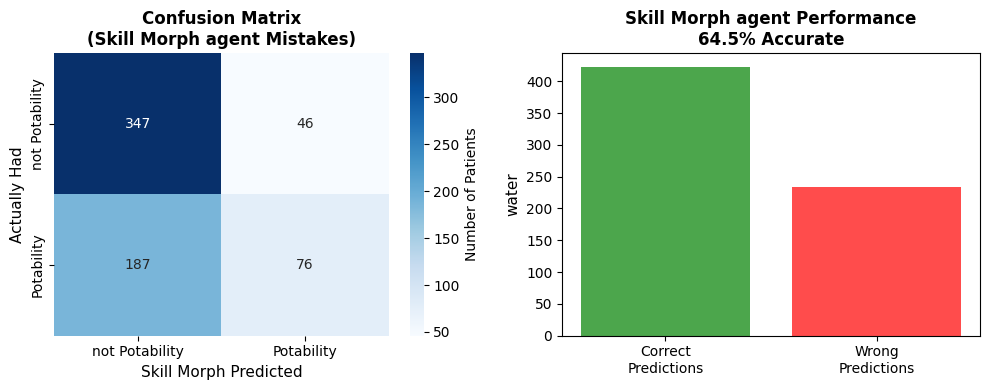

In [13]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\nHow to read Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              Benign   Malignant
Real Benign     {cm[0,0]}        {cm[0,1]}   ← {cm[0,1]} False Alarms (predicted Potability but was not Potability)
Real Malignant  {cm[1,0]}        {cm[1,1]}   ← {cm[1,0]} Missed Malignant (predicted not Potability but was Potability) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing Potability cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['not Potability', 'Potability'],
            yticklabels=['not Potability', 'Potability'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Skill Morph agent Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Skill Morph agent Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('water', fontsize=11)

plt.tight_layout()
plt.show()

# **Detailed Performance**

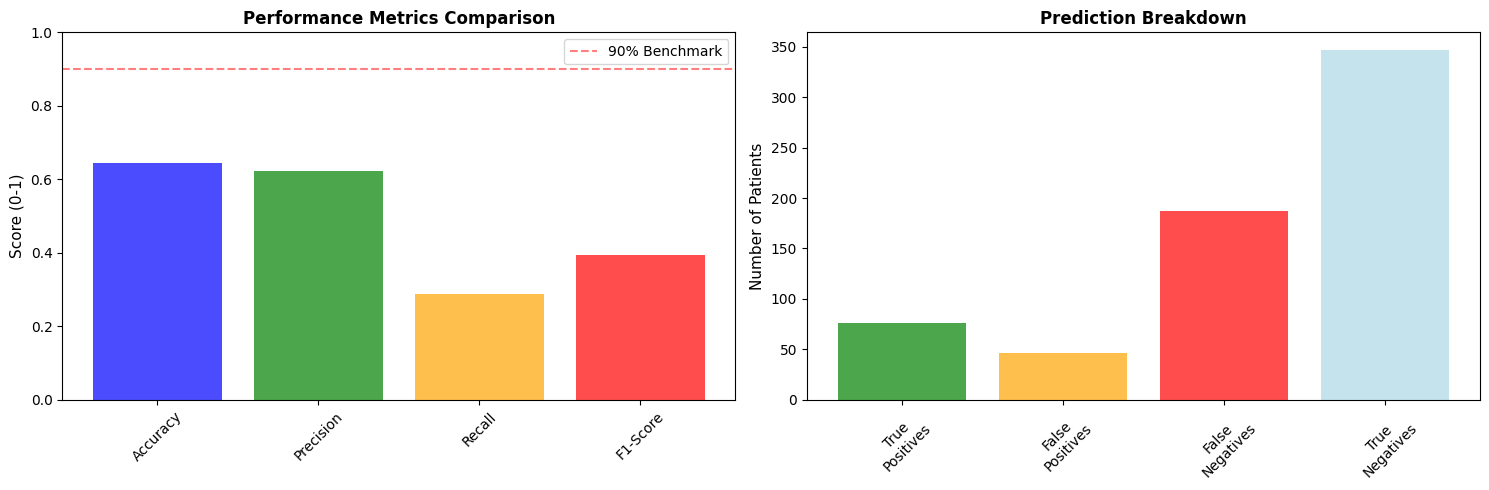

In [14]:


# Calculate detailed metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


# Create detailed metrics visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)


# Add benchmark line
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90% Benchmark')
plt.legend()
plt.xticks(rotation=45)



# Subplot 2: Precision vs Recall visualization
plt.subplot(1, 2, 2)
# Create a simple precision-recall visualization
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ROC CURVE & AUC - ADVANCED EVALUATION


 STEP 9: ROC Curve & AUC - The Ultimate Evaluation

ROC CURVE & AUC EXPLAINED:

ROC = Receiver Operating Characteristic
AUC = Area Under Curve


OUR SKILL MORPH DOCTOR AUC SCORE:
AUC Score: 0.6222 (62.22%)


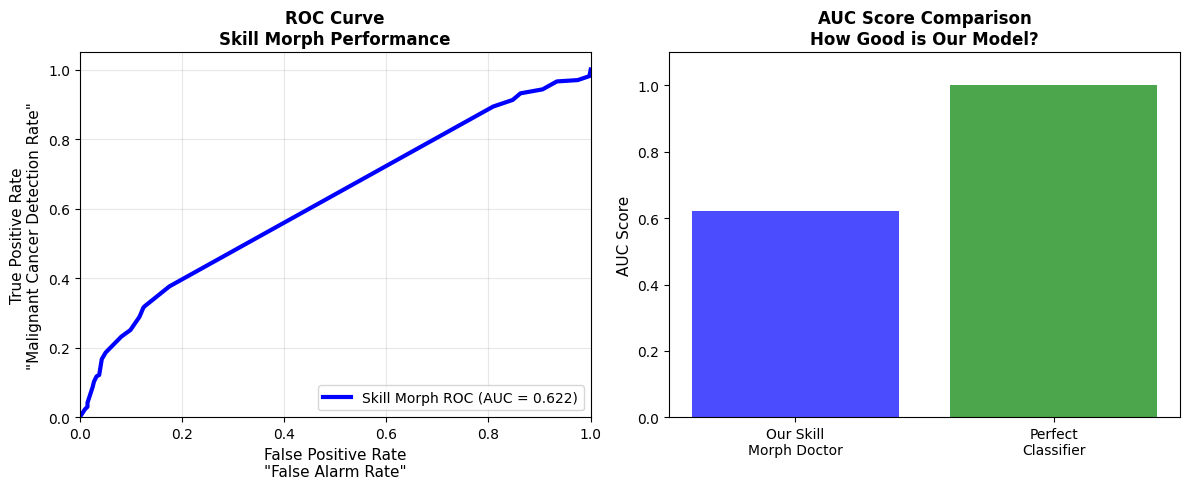

In [15]:
print("\n STEP 9: ROC Curve & AUC - The Ultimate Evaluation")
print("=" * 60)

print("""
ROC CURVE & AUC EXPLAINED:

ROC = Receiver Operating Characteristic
AUC = Area Under Curve

""")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print(f"OUR SKILL MORPH DOCTOR AUC SCORE:")
print(f"{'='*40}")
print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create comprehensive ROC visualization
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=3, label=f'Skill Morph ROC (AUC = {auc_score:.3f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n"False Alarm Rate"', fontsize=11)
plt.ylabel('True Positive Rate\n"Malignant Cancer Detection Rate"', fontsize=11)
plt.title('ROC Curve\nSkill Morph Performance', fontweight='bold', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [auc_score, 1.0]
colors_auc = ['blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


Assignment

In [ ]:
Question 1: Find the Best Tree Depth

Task: Test depths 3, 4, 5 and find highest accuracy

Optional: Feature: 10; test depths 5,6,7,8,9


Question 2: Calculate All Metrics

Task: Use best depth to calculate precision, recall, F1-score


Question 3: Test on New Patients


Question 4: Analyze Confusion Matrix

SyntaxError: invalid syntax (ipython-input-2051635358.py, line 1)